# Exploratory Data Analysis

In [2]:
!pip install pandas_profiling
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fde8973e23f44fad2b8a6405ca561f0f4a5bae5aa5a8e383d3a0b47d652b1017
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [3]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

<ipython-input-3-9eb4454b73b2>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [7]:
data1 = pd.read_csv("data_clean.csv")

In [8]:
data1

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [9]:
data1.tail(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
148,149,30.0,193.0,6.9,70,9,26,2010,70,C
149,150,NaN,145.0,13.2,77,9,27,2010,77,PS
150,151,14.0,191.0,14.3,75,9,28,2010,75,S
151,152,18.0,131.0,8.0,76,9,29,2010,76,PS
152,153,20.0,223.0,11.5,68,9,30,2010,68,S
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [ ]:
data1

In [10]:
#Data Structure
type(data1)
data1.shape

(158, 10)

In [11]:
#data types
data1.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

# Data type conversion

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [ ]:
data1

In [12]:
data2=data1.iloc[:,1:]

In [ ]:
data2

In [13]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data=data2.copy()

In [14]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data['Weather']=data['Weather'].astype('category')           #data['Wind']=data['Wind'].astype('int64')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


# Duplicates

In [16]:
#Count of duplicated rows
data[data.duplicated()].shape

(1, 9)

In [15]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [17]:
#Print the duplicated rows
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [18]:
data_cleaned1=data.drop_duplicates()

In [19]:
data_cleaned1.shape

(157, 9)

# Drop columns

In [20]:
data_cleaned2=data_cleaned1.drop('Temp C',axis=1)

In [21]:
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


# Rename the columns

In [22]:
#rename the Solar column
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [23]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


# Outlier Detection

<Axes: >

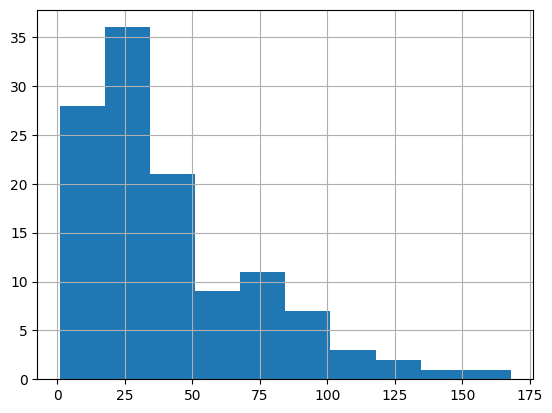

In [24]:
# histogram of Ozone
data_cleaned3['Ozone'].hist()

<Axes: >

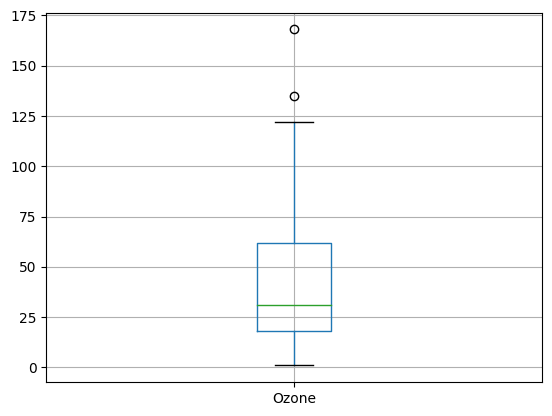

In [25]:
#Box plot
data_cleaned3.boxplot(column=['Ozone'])

In [26]:
#Descriptive stat
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [26]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


<Axes: >

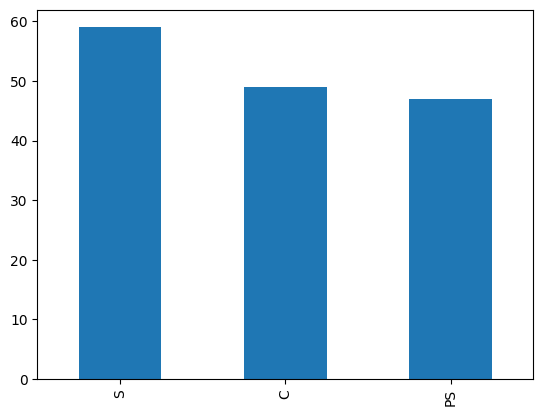

In [27]:
#Bar plot
data['Weather'].value_counts().plot.bar()

# Missing Values and Imputation

<Axes: >

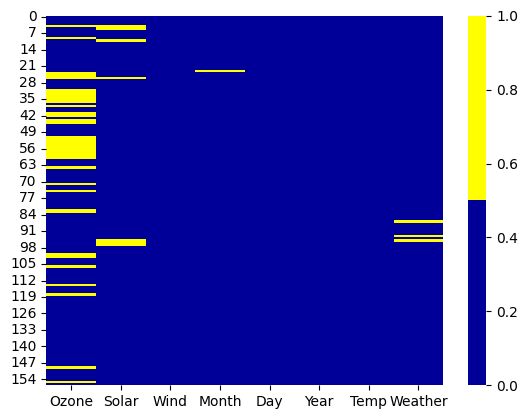

In [28]:
import seaborn as sns
cols = data_cleaned3.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))

In [29]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,NaN,NaN,14.3,5.0,5,2010,56,S
5,28.0,NaN,14.9,5.0,6,2010,66,C
9,NaN,194.0,8.6,5.0,10,2010,69,S
10,7.0,NaN,6.9,5.0,11,2010,74,C
23,32.0,92.0,12.0,NaN,24,2010,61,C


In [30]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [31]:
#Mean Imputation
mean = data_cleaned3['Ozone'].mean()
print(mean)

41.81512605042017


In [ ]:
data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(mean)

In [ ]:
data_cleaned3

In [32]:
#Missing value imputation for categorical vlaue
#Get the object columns
obj_columns=data_cleaned3[['Weather']]

In [33]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [ ]:
#Missing value imputation for categorical vlaue
obj_columns=obj_columns.fillna(obj_columns.mode().iloc[0])

In [ ]:
obj_columns.isnull().sum()

In [ ]:
data_cleaned3.shape

In [ ]:
obj_columns.shape

In [34]:
#Join the data set with imputed object dataset
data_cleaned4=pd.concat([data_cleaned3,obj_columns],axis=1)

In [35]:
data_cleaned4.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
Weather     3
dtype: int64

# Scatter plot and Correlation analysis

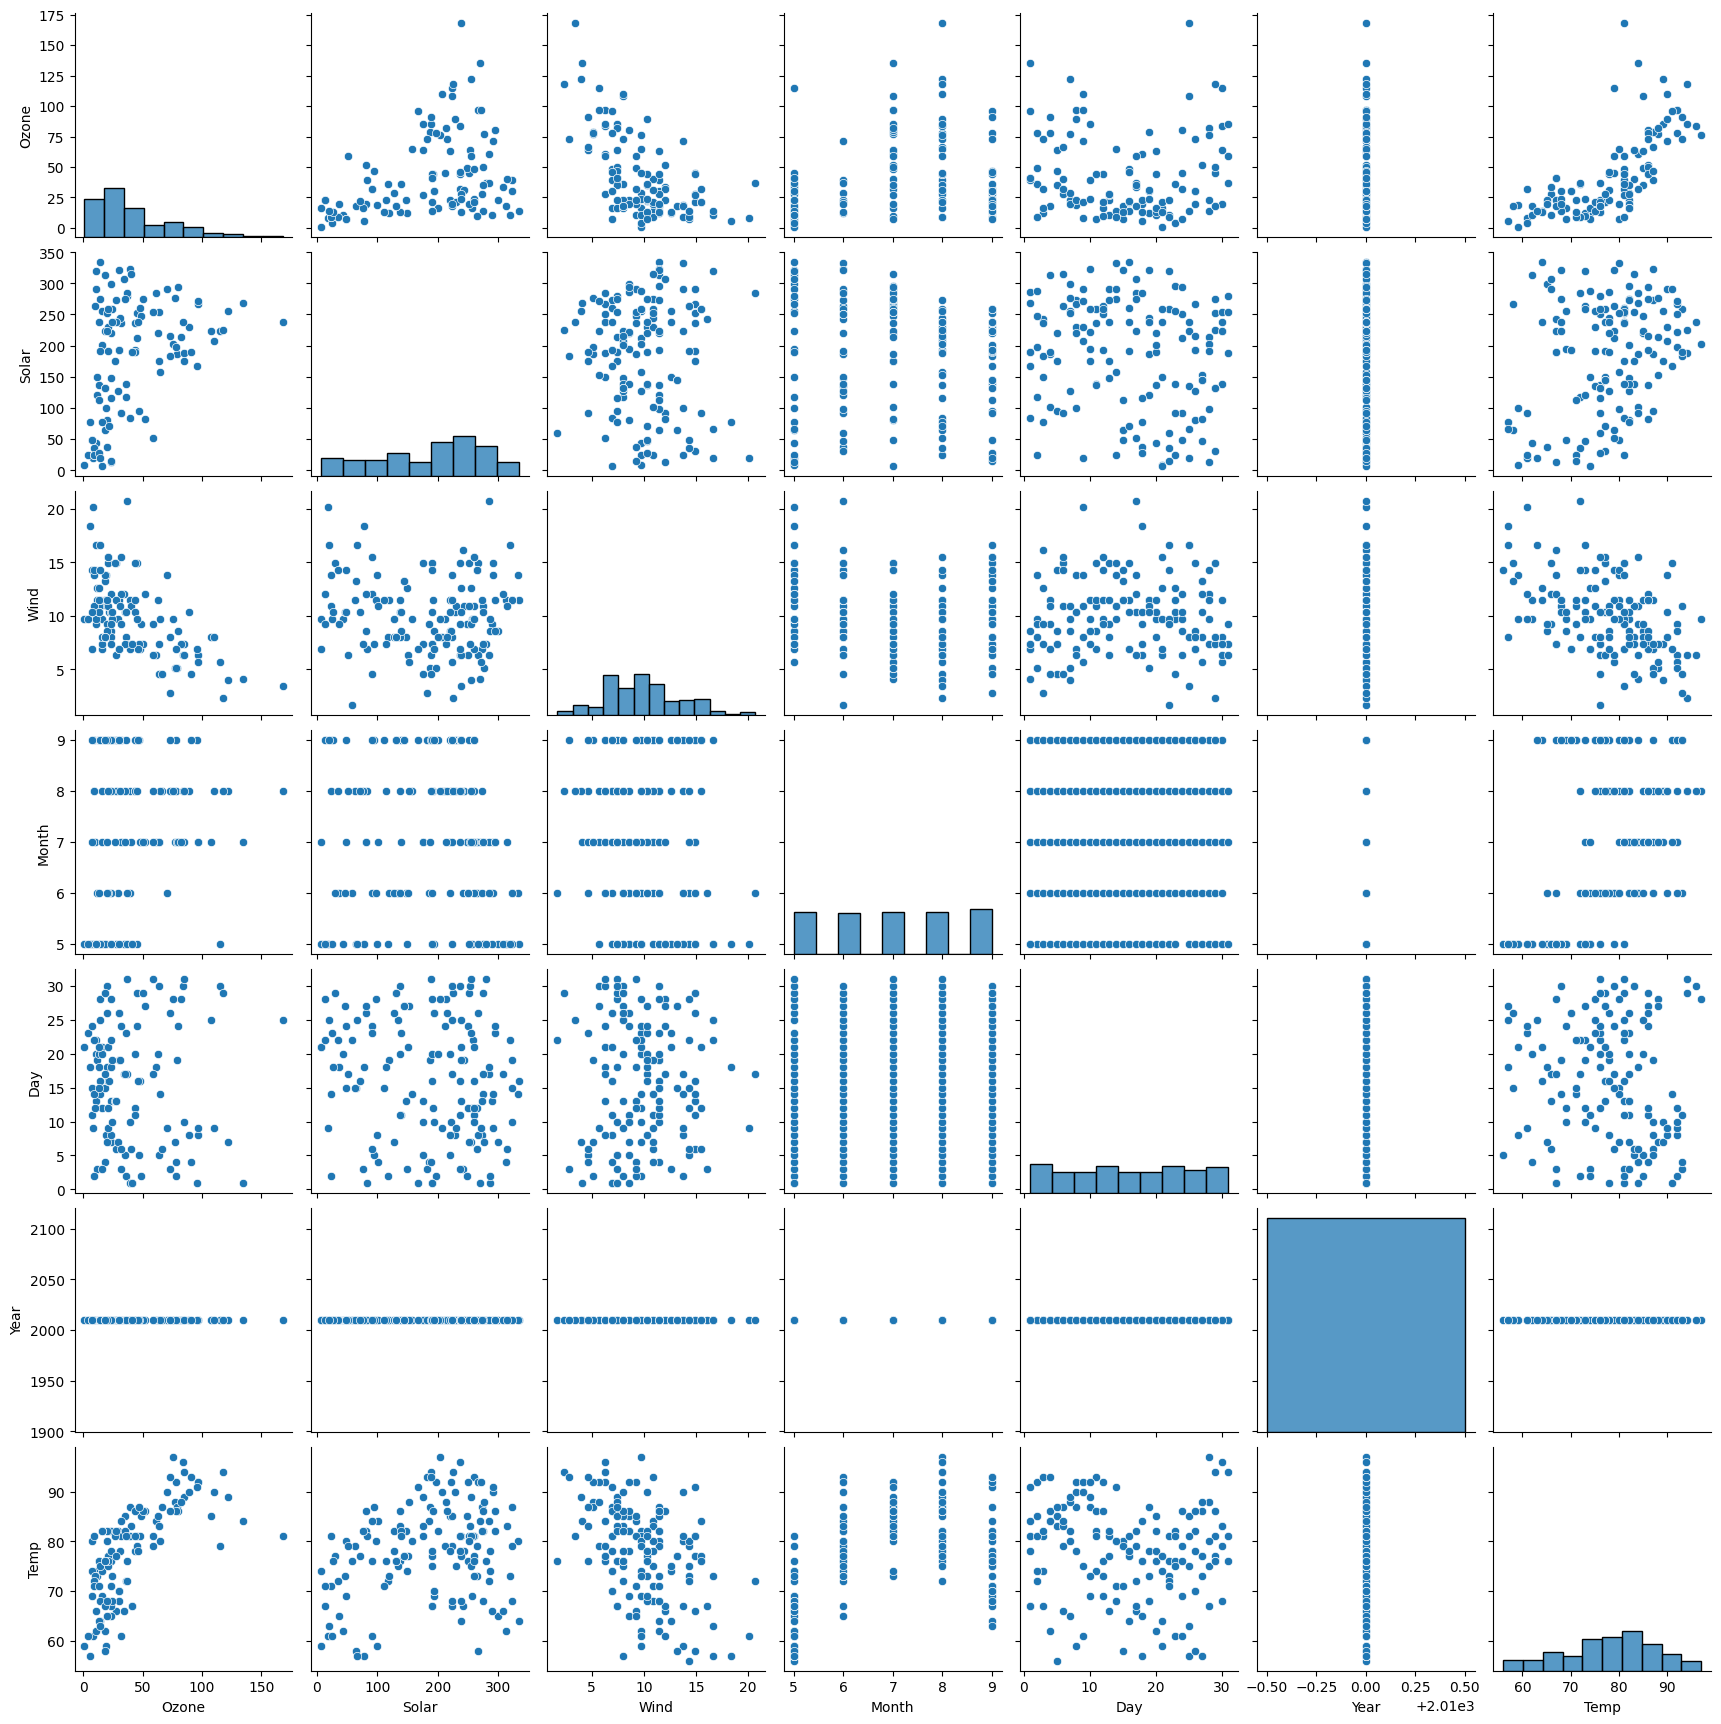

In [36]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned3)

In [37]:
#Correlation
data_cleaned3.corr()

<ipython-input-37-1ea4a6bf9a23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_cleaned3.corr()


,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.350274,-0.590270,0.147231,-0.025465,NaN,0.694404
Solar,0.350274,1.000000,-0.057407,-0.094012,-0.155663,NaN,0.273558
Wind,-0.590270,-0.057407,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.147231,-0.094012,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.025465,-0.155663,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.694404,0.273558,-0.441228,0.398516,-0.122787,NaN,1.000000


# Transformations

#### Dummy Variable

In [ ]:
#Creating dummy variable for Weather column
data_cleaned4=pd.get_dummies(data,columns=['Weather'])

In [ ]:
data_cleaned4

In [ ]:
data_cleaned4=data_cleaned4.dropna()

#### Normalization of the data

In [38]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_cleaned4.values

In [ ]:
array = data_cleaned3.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


In [ ]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [ ]:
array = data_cleaned4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

# Speed up the EDA process

In [ ]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html')

In [ ]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')